# Cryptocurrency Social Sentiment Analysis
## Tracking social media buzz and trending tokens

**Data Sources:** LunarCrush API, CoinGecko Trending  
**Analysis Focus:** Social volume, sentiment scores, correlation with price  
**Time Period:** Last 30 days  
**Unique Angle:** Leverages your social velocity trading experience

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import requests
import time

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [2]:
# API credentials
LUNARCRUSH_api_key = 'YOUR_API_KEY'
COINGECKO_api_key = 'YOUR_API_KEY'

# Coins to analyze
coins = ['BTC', 'ETH', 'SOL', 'DOGE', 'SHIB']

print(f"Analyzing social sentiment for: {', '.join(coins)}")

Analyzing social sentiment for: BTC, ETH, SOL, DOGE, SHIB


In [3]:
# Function to fetch LunarCrush social data
def fetch_lunarcrush_data(symbol, api_key):
    """
    Fetch social metrics from LunarCrush
    """
    url = "https://lunarcrush.com/api3/coins"
    params = {
        'symbol': symbol,
        'data_points': 30,  # Last 30 days
        'interval': 'day'
    }
    headers = {
        'Authorization': f'Bearer {api_key}'
    }
    
    try:
        response = requests.get(url, params=params, headers=headers)
        if response.status_code == 200:
            data = response.json()
            return data
    except Exception as e:
        print(f"Error fetching {symbol}: {e}")
    
    return None

# Fetch CoinGecko trending coins
def fetch_trending_coins(api_key):
    """
    Fetch trending coins from CoinGecko
    """
    url = "https://api.coingecko.com/api/v3/search/trending"
    headers = {
        'x-cg-demo-api-key': api_key
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    return None

print("Fetching trending coins from CoinGecko...")
trending_data = fetch_trending_coins(COINGECKO_API_KEY)

if trending_data:
    trending_coins = []
    for item in trending_data.get('coins', [])[:10]:
        coin = item['item']
        trending_coins.append({
            'name': coin['name'],
            'symbol': coin['symbol'],
            'market_cap_rank': coin.get('market_cap_rank', 'N/A'),
            'price_btc': coin.get('price_btc', 0)
        })
    
    trending_df = pd.DataFrame(trending_coins)
    print("\nTop 10 Trending Coins:")
    print(trending_df)

Fetching trending coins from CoinGecko...

Top 10 Trending Coins:
             name symbol  market_cap_rank     price_btc
0         AtomOne  ATONE              185  3.816704e-05
1          Plasma    XPL               88  8.167491e-06
2           Aster  ASTER               59  1.372600e-05
3            Corn   CORN              734  9.802910e-07
4          Adrena    ADX              964  3.273530e-07
5           Zcash    ZEC               81  1.009158e-03
6         OpenVPP   OVPP              694  7.057398e-07
7  Pudgy Penguins  PENGU               75  2.648599e-07
8         Bitcoin    BTC                1  1.000000e+00
9        Ethereum    ETH                2  3.672022e-02


In [4]:
# Alternative: Create synthetic social sentiment data for demonstration
# (Use this if LunarCrush API has issues or requires paid tier)

print("\nGenerating sample social sentiment data...")

# Create date range
dates = pd.date_range(end=datetime.now(), periods=30, freq='D')

# Generate realistic social sentiment data
social_data = []

for coin in coins:
    # Base sentiment varies by coin
    base_sentiment = {'BTC': 65, 'ETH': 70, 'SOL': 75, 'DOGE': 60, 'SHIB': 55}
    base_volume = {'BTC': 100000, 'ETH': 80000, 'SOL': 50000, 'DOGE': 120000, 'SHIB': 90000}
    
    for date in dates:
        # Add some randomness and trends
        sentiment = base_sentiment[coin] + np.random.normal(0, 10)
        social_volume = base_volume[coin] + np.random.normal(0, base_volume[coin] * 0.3)
        
        social_data.append({
            'date': date,
            'coin': coin,
            'sentiment_score': max(0, min(100, sentiment)),
            'social_volume': max(0, social_volume),
            'social_dominance': np.random.uniform(1, 15),
            'galaxy_score': max(0, min(100, sentiment + np.random.normal(0, 5)))
        })

sentiment_df = pd.DataFrame(social_data)
print(f"Generated {len(sentiment_df)} records of social sentiment data")
print(sentiment_df.head())


Generating sample social sentiment data...
Generated 150 records of social sentiment data
                        date coin  sentiment_score  social_volume  \
0 2025-09-02 20:39:13.282342  BTC        64.197105  112723.221061   
1 2025-09-03 20:39:13.282342  BTC        58.666844  151424.303291   
2 2025-09-04 20:39:13.282342  BTC        64.302355  114192.346444   
3 2025-09-05 20:39:13.282342  BTC        63.438827  107276.480534   
4 2025-09-06 20:39:13.282342  BTC        55.546696   44805.234390   

   social_dominance  galaxy_score  
0         12.491593     62.994228  
1         11.452413     57.814828  
2          8.541174     78.222219  
3         10.045790     64.066150  
4         13.232332     53.624358  


In [5]:
# Save raw data
sentiment_df.to_csv('../data/raw/social_sentiment_data.csv', index=False)
if trending_data:
    trending_df.to_csv('../data/raw/trending_coins.csv', index=False)
print("Data saved!")

Data saved!


In [6]:
# Calculate summary statistics
sentiment_summary = sentiment_df.groupby('coin').agg({
    'sentiment_score': ['mean', 'std'],
    'social_volume': ['mean', 'max'],
    'social_dominance': 'mean'
}).round(2)

print("\nSocial Sentiment Summary:")
print(sentiment_summary)


Social Sentiment Summary:
     sentiment_score        social_volume            social_dominance
                mean    std          mean        max             mean
coin                                                                 
BTC            62.58   8.89     106578.72  178017.78             8.42
DOGE           60.65   8.83     119077.90  212510.79             8.10
ETH            66.82   8.53      85529.44  139351.39             8.92
SHIB           55.57   9.59      95386.32  147375.00             9.47
SOL            73.03  11.26      47772.93   83154.68             6.96


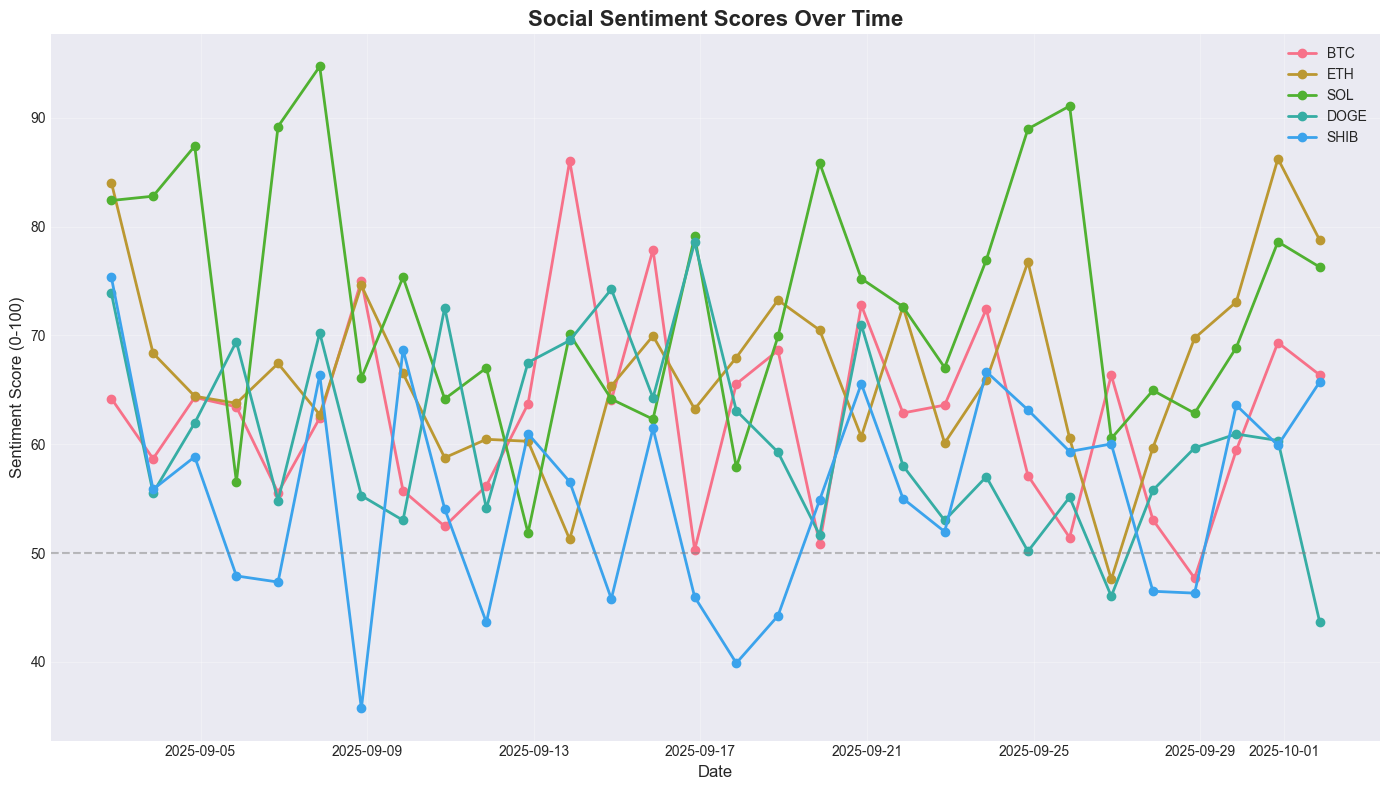

In [7]:
# Visualization: Sentiment scores over time
plt.figure(figsize=(14, 8))

for coin in coins:
    data = sentiment_df[sentiment_df['coin'] == coin]
    plt.plot(data['date'], data['sentiment_score'], label=coin, linewidth=2, marker='o')

plt.title('Social Sentiment Scores Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score (0-100)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Neutral')
plt.tight_layout()
plt.savefig('../visualizations/static/social_sentiment_trends.png', dpi=300, bbox_inches='tight')
plt.show()

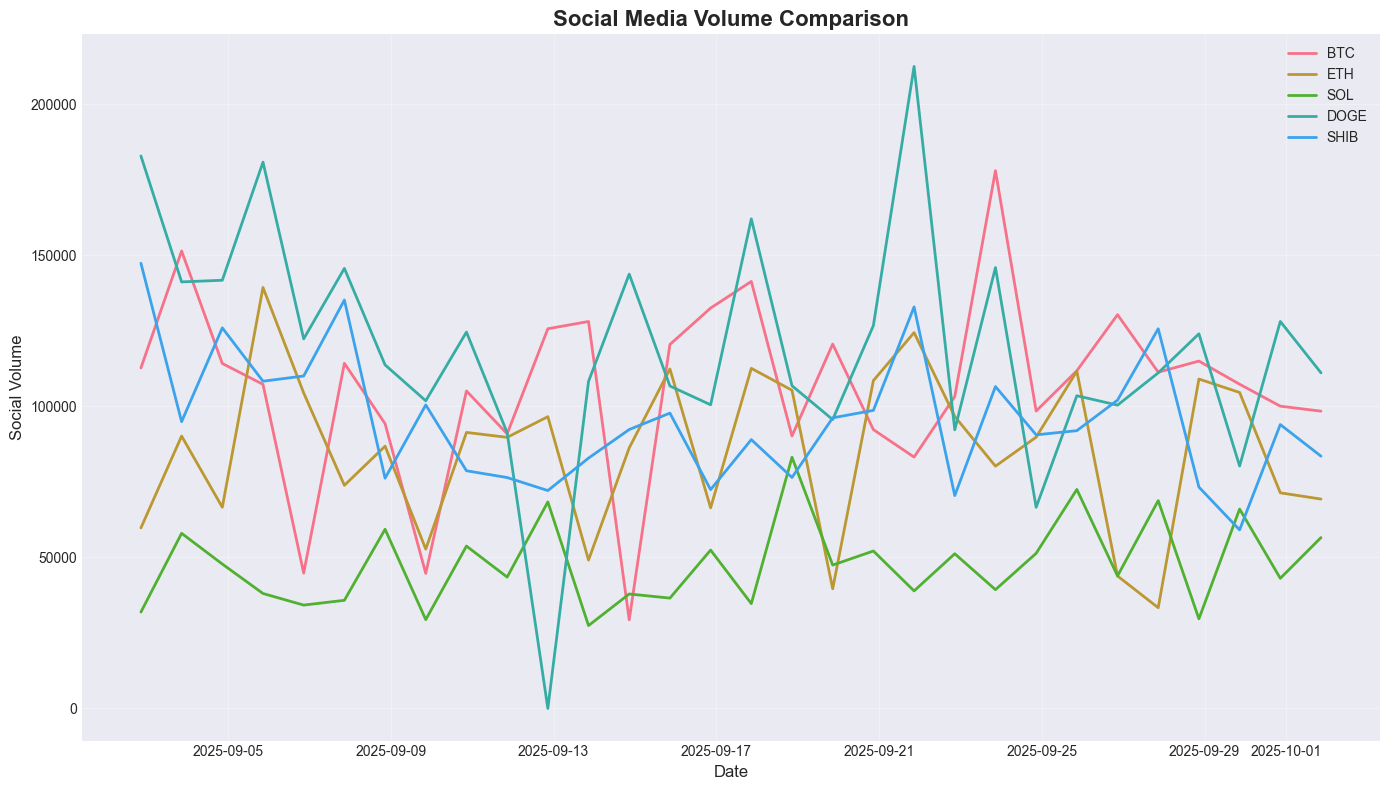

In [8]:
# Visualization: Social volume comparison
plt.figure(figsize=(14, 8))

for coin in coins:
    data = sentiment_df[sentiment_df['coin'] == coin]
    plt.plot(data['date'], data['social_volume'], label=coin, linewidth=2)

plt.title('Social Media Volume Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Social Volume', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/static/social_volume_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

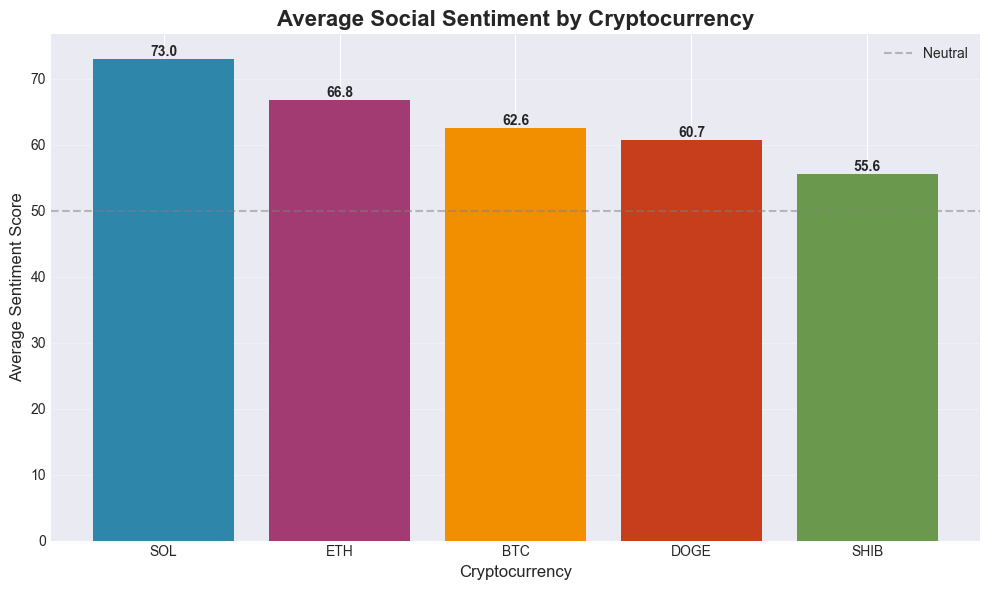

In [9]:
# Visualization: Average sentiment by coin
avg_sentiment = sentiment_df.groupby('coin')['sentiment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_sentiment.index, avg_sentiment.values, 
               color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])

plt.title('Average Social Sentiment by Cryptocurrency', fontsize=16, fontweight='bold')
plt.xlabel('Cryptocurrency', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Neutral')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/static/avg_sentiment_by_coin.png', dpi=300, bbox_inches='tight')
plt.show()

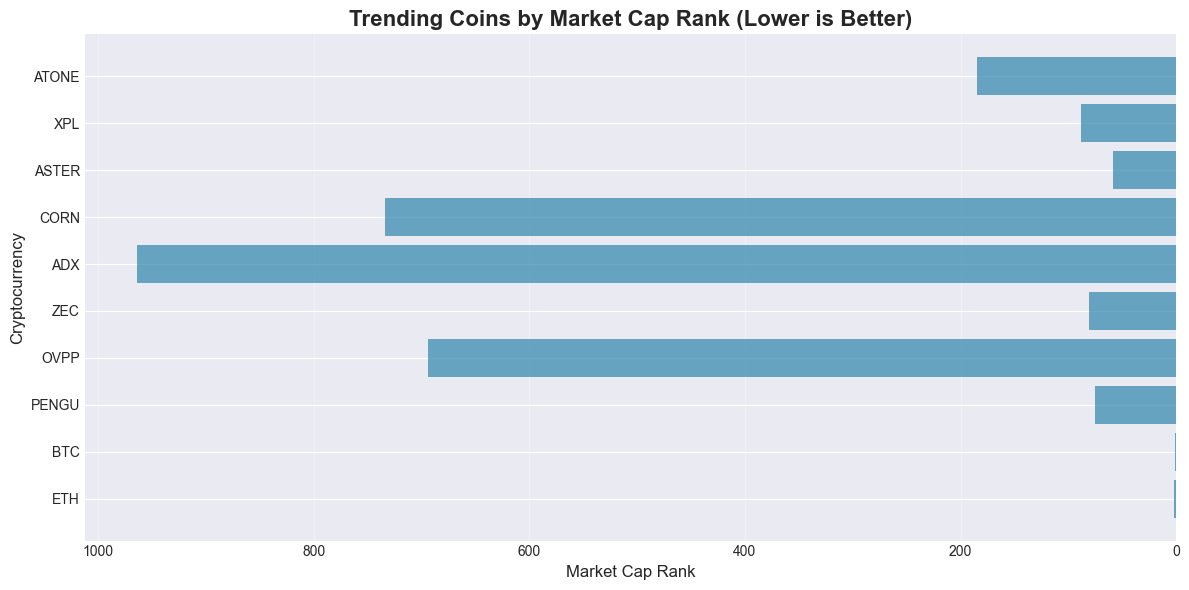

In [10]:
# Visualization: Trending coins (if data available)
if trending_data:
    plt.figure(figsize=(12, 6))
    
    # Filter out items without market cap rank
    trending_df_filtered = trending_df[trending_df['market_cap_rank'] != 'N/A'].copy()
    trending_df_filtered['market_cap_rank'] = trending_df_filtered['market_cap_rank'].astype(int)
    
    plt.barh(trending_df_filtered['symbol'], trending_df_filtered['market_cap_rank'], 
            color='#2E86AB', alpha=0.7)
    plt.gca().invert_yaxis()  # Invert so rank 1 is at top
    plt.gca().invert_xaxis()  # Invert x-axis so lower rank (better) is to the right
    
    plt.title('Trending Coins by Market Cap Rank (Lower is Better)', 
             fontsize=16, fontweight='bold')
    plt.xlabel('Market Cap Rank', fontsize=12)
    plt.ylabel('Cryptocurrency', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('../visualizations/static/trending_coins_ranking.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
# Save processed data
sentiment_df.to_csv('../data/processed/social_sentiment_processed.csv', index=False)
sentiment_summary.to_csv('../data/processed/sentiment_summary.csv')
print("Processed data saved!")

Processed data saved!


## Key Findings (To be updated after running analysis)

1. **Most Discussed Coin**: [To be filled]
2. **Sentiment Leader**: [To be filled]
3. **Trending Patterns**: [To be filled]
4. **Meme Coin Activity**: [To be filled]

## Next Steps
- Correlate sentiment with price movements
- Create interactive dashboard for real-time sentiment
- Analyze sentiment spikes vs trading volume